<a id='top'></a>
### 目录
1. [C-REITs市场走势图](#1.1)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import FuncFormatter
# from adjustText import adjust_text

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显正负号

# plt.style.use('ggplot') # 重启IDE即可复原

#**********************************************************************
# jupyter notebook 图片显示模糊的解决办法
# 多加一行配置，就能够让 Matplotlib 在 Jupyter Notebook 上面输出矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 指定了输出的格式是svg
#**********************************************************************

# 画图坐标轴数字显示为百分比格式
def to_percent(value, position):
    return '{:.2%}'.format(value)  # 显示2位百分数

In [28]:
from WindPy import w

w.start() # 默认命令超时时间为120秒，如需设置超时时间可以加入waitTime参数，例如waitTime=60,即设置命令超时时间为60秒  

w.isconnected() # 判断WindPy是否已经登录成功

True

In [29]:
# Bo: 注意，该记事本代码是基于"REITs_Index_WindPy"的仓库代码，用其生成好的指数数据，读取相关的EXCEL数据，并重新绘制了一些报告图表。

# 报告的日期区间
start_date = "2021-06-21"  # 起始日
end_date = "2023-10-31"  # 截止日


# 从之前生成的指数EXCEL中提取出指数数据。
path = r'D:\Work\DailyReport\REITs_Index_WindPy'
file = 'REITs_Index_Report_2023-10-31.xlsx' 


# 获取全部REITS的代码
reits_list = w.wset("sectorconstituent", "sectorid=1000041324000000", usedf=True)[1]['wind_code'].to_list()
print(len(reits_list))
reits_list

29


['180101.SZ',
 '180102.SZ',
 '180103.SZ',
 '180201.SZ',
 '180202.SZ',
 '180301.SZ',
 '180401.SZ',
 '180501.SZ',
 '180801.SZ',
 '508000.SH',
 '508001.SH',
 '508006.SH',
 '508007.SH',
 '508008.SH',
 '508009.SH',
 '508018.SH',
 '508019.SH',
 '508021.SH',
 '508027.SH',
 '508028.SH',
 '508056.SH',
 '508058.SH',
 '508066.SH',
 '508068.SH',
 '508077.SH',
 '508088.SH',
 '508096.SH',
 '508098.SH',
 '508099.SH']

In [30]:

# 从某个SHEET提取对应的数据。
# 第1个参数是sheet名，后2个是列重命名
def GetData(sheetName, reName1, reName2):
    
    df = pd.read_excel(path + '\\' + file,sheet_name=sheetName)
    df.head()

    # 将第一列的日期设为index，方便后续与WIND返回的数据进行合并。
    df.index = df.iloc[:,0]
    df.index.name = "" # 去掉默认的名字“Unnamed: 0”
    df = df[["价格指数","总回报指数"]]  # 只要后2列

    # 列重命名
    df = df.rename(columns={"价格指数": reName1,"总回报指数": reName2})

    return df



# 合并提取的3个表

df_tmp = pd.merge(

                pd.merge(
                    # 1、取总指数，并重命名
                    GetData("C-REITs指数","德邦C-REITs价格指数","德邦C-REITs总回报指数"),
                    # 2、取产权指数，并重命名
                    GetData("产权类REITs指数","产权类REITs价格指数","产权类REITs总回报指数"),

                    left_index=True,right_index=True
                    ),

                # 3、取经营类指数，并重命名
                GetData("经营类REITs指数","经营类REITs价格指数","经营类REITs总回报指数"),

                                left_index=True,right_index=True
                            )



df_tmp


,德邦C-REITs价格指数,德邦C-REITs总回报指数,产权类REITs价格指数,产权类REITs总回报指数,经营类REITs价格指数,经营类REITs总回报指数
,,,,,,
2021-06-21,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-06-22,98.281168,98.281168,97.930679,97.930679,98.733381,98.733381
2021-06-23,97.684942,97.684942,97.219802,97.219802,98.284871,98.284871
2021-06-24,97.431284,97.431284,97.145270,97.145270,97.800733,97.800733
2021-06-25,97.614799,97.614799,97.221479,97.221479,98.122341,98.122341
...,...,...,...,...,...,...
2023-10-25,89.424829,98.726119,100.538412,107.267098,76.619689,88.511452
2023-10-26,89.268645,98.553691,100.364545,107.081594,76.483956,88.354653
2023-10-27,89.186733,98.542540,100.194932,106.900630,76.499788,88.543305


In [31]:
# 获取中证REITs及股债指数：注意选择考虑分红再投资的对应的回报指数，而非价格指数。

# 中证REITs(收盘)全收益指数：932006CNY01.CSI 
# 沪深300全收益指数：H00300.CSI
# 中债-新综合财富(总值)指数：CBA00101.CS
df = w.wsd(["932006CNY01.CSI","H00300.CSI","CBA00101.CS"], "close", start_date, end_date, usedf=True)[1]

# 合并中证REITs及股债指数
df_tmp = pd.merge(
                # 重命名列
                df.rename(columns={"932006CNY01.CSI": "中证REITs全收益指数","H00300.CSI": "沪深300全收益指数",
                                  "CBA00101.CS": "中债-新综合财富(总值)指数"}),

                df_tmp,

                left_index=True,right_index=True
                )


# 获取各个REIT的每日成交额，WIND函数为amt，单元为元

df = w.wsd(reits_list, "amt", start_date, end_date, usedf=True)[1]


# 合并每日成交额

df_tmp = pd.merge(

                (df.sum(axis=1)/10000).to_frame("总成交额(万元)"), # 当日全部成交额加总，单位转万元

                df_tmp,

                left_index=True,right_index=True
                )



df_tmp

,总成交额(万元),中证REITs全收益指数,沪深300全收益指数,中债-新综合财富(总值)指数,德邦C-REITs价格指数,德邦C-REITs总回报指数,产权类REITs价格指数,产权类REITs总回报指数,经营类REITs价格指数,经营类REITs总回报指数
,,,,,,,,,,
2021-06-21,185962.5384,NaN,6668.0974,206.0171,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-06-22,50779.5903,NaN,6710.1453,206.0465,98.281168,98.281168,97.930679,97.930679,98.733381,98.733381
2021-06-23,24007.3136,NaN,6743.9179,206.1181,97.684942,97.684942,97.219802,97.219802,98.284871,98.284871
2021-06-24,15960.7040,NaN,6756.9170,206.1921,97.431284,97.431284,97.145270,97.145270,97.800733,97.800733
2021-06-25,12733.1476,NaN,6871.8496,206.2454,97.614799,97.614799,97.221479,97.221479,98.122341,98.122341
...,...,...,...,...,...,...,...,...,...,...
2023-10-25,32640.2434,916.2337,4867.6260,226.4802,89.424829,98.726119,100.538412,107.267098,76.619689,88.511452
2023-10-26,29908.2703,914.3919,4881.0813,226.5373,89.268645,98.553691,100.364545,107.081594,76.483956,88.354653
2023-10-27,31565.2187,914.6663,4948.4273,226.5259,89.186733,98.542540,100.194932,106.900630,76.499788,88.543305


In [32]:
# 将其他对比指数，进行标准化调整！起始调整为100

# 1、中证基日为2021年9月30日，基点为1000。直接将其除以10
# 2、股债指数将其标准化为100,除以首期值(2021年6月21日)


df_tmp.loc[:,"中证REITs全收益指数"] = df_tmp["中证REITs全收益指数"] / 10

df_tmp.loc[:,"沪深300全收益指数"] = df_tmp["沪深300全收益指数"] / df_tmp["沪深300全收益指数"].iloc[0] * 100
df_tmp.loc[:,"中债-新综合财富(总值)指数"] = df_tmp["中债-新综合财富(总值)指数"] / df_tmp["中债-新综合财富(总值)指数"].iloc[0] * 100

df_tmp

,总成交额(万元),中证REITs全收益指数,沪深300全收益指数,中债-新综合财富(总值)指数,德邦C-REITs价格指数,德邦C-REITs总回报指数,产权类REITs价格指数,产权类REITs总回报指数,经营类REITs价格指数,经营类REITs总回报指数
,,,,,,,,,,
2021-06-21,185962.5384,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-06-22,50779.5903,NaN,100.630583,100.014271,98.281168,98.281168,97.930679,97.930679,98.733381,98.733381
2021-06-23,24007.3136,NaN,101.137063,100.049025,97.684942,97.684942,97.219802,97.219802,98.284871,98.284871
2021-06-24,15960.7040,NaN,101.332008,100.084944,97.431284,97.431284,97.145270,97.145270,97.800733,97.800733
2021-06-25,12733.1476,NaN,103.055627,100.110816,97.614799,97.614799,97.221479,97.221479,98.122341,98.122341
...,...,...,...,...,...,...,...,...,...,...
2023-10-25,32640.2434,91.62337,72.998724,109.932719,89.424829,98.726119,100.538412,107.267098,76.619689,88.511452
2023-10-26,29908.2703,91.43919,73.200510,109.960435,89.268645,98.553691,100.364545,107.081594,76.483956,88.354653
2023-10-27,31565.2187,91.46663,74.210483,109.954902,89.186733,98.542540,100.194932,106.900630,76.499788,88.543305


In [33]:
# # pandas面积图: plot.area()
# df_tmp.iloc[:,0].plot.area()

# df_tmp.iloc[:,1:].plot()

### <font color = 'red'>C-REITs市场走势图</font><a id="1.1"></a>
[**回到目录**](#top)

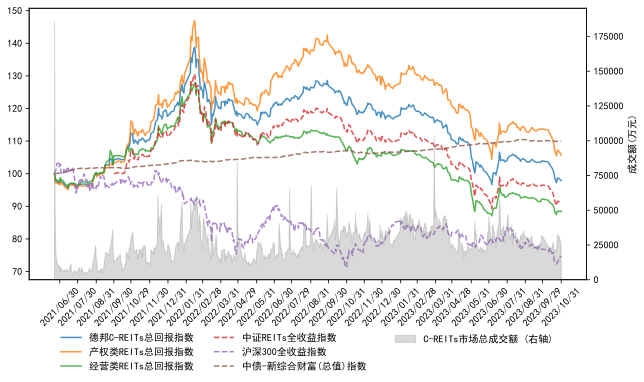

In [34]:
# Python绘制组合图(折线图和面积图，主次坐标轴，双y轴)

#取出作图的数据
x = df_tmp.index
y1 =df_tmp.iloc[:,1]
y2 =df_tmp.iloc[:,2]
y3 =df_tmp.iloc[:,3]
y4 =df_tmp.iloc[:,5]
y5 =df_tmp.iloc[:,7]
y6 =df_tmp.iloc[:,9]

y_amt = df_tmp.iloc[:,0]

# fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
# 标题
# ax1.set_title("C-REITs市场走势图",fontsize='15')
# plt.title("C-REITs市场走势图",fontsize='15')  # 方法2：这样也行

# 画折线图
ax1.plot(x, y4, alpha = .8, label = y4.name)
ax1.plot(x, y5, alpha = .8, label = y5.name)
ax1.plot(x, y6, alpha = .8, label = y6.name)
ax1.plot(x, y1, alpha = .8, label = y1.name, linestyle= '--')  # 对比指数均采用虚线
ax1.plot(x, y2, alpha = .8, label = y2.name, linestyle= '--')  # 对比指数均采用虚线
ax1.plot(x, y3, alpha = .8, label = y3.name, linestyle= '--')  # 对比指数均采用虚线

# 图例
# ax1.legend(("价格指数",), loc = [0.2, -0.155])
# ax1.legend(("价格指数","总回报指数"), loc = [0.2, -0.155])
ax1.legend(loc = [0.05, -0.35], ncol=2, frameon=False)
# ax1.legend(loc = "upper left")

# 设置轴标题
# ax1.set_ylabel('价格指数',fontsize='12')
# plt.ylabel('价格指数',fontsize='12') # 方法2：这样也行
# 设置轴区间
# ax1.set_ylim(50, 150)
# plt.ylim(50, 150) # 方法2：这样也行


#############################################################
ax2 = ax1.twinx() #组合图必须加这个!!!!!
# twinx()函数表示共享x轴
# twiny()表示共享y轴
# 共享表示的就是x轴使用同一刻度线
#############################################################\

#画面积图
# plt.fill_between(x, y_amt,alpha=.3,color='gray')
plt.stackplot(x, y_amt,alpha=.3,color='gray') # 面积图方法2：这样也行

# 设置轴和图例
ax2.legend(("C-REITs市场总成交额 (右轴)",), loc = [0.65, -0.25], frameon=False)
ax2.set_ylabel('成交额(万元)',fontsize='10')


# 设置X轴格式
#****************************************************************************************************
# 注意：必须要在组合图ax1和ax2都画完之后统一设置，如果在ax1后面设置X轴，会被后面ax2覆盖导致没有效果！
# 1、日期格式化显示
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

# 2、坐标轴日期间隔，倾斜度
my_x_ticks = pd.date_range(start_date, end_date, freq='BM') # BM月末，MS月初，季度末：Q-JAN, Q-FEB
ax1.set_xticks(my_x_ticks)
ax1.tick_params(axis='x',rotation=45)  # 默认 axis='both'表示两条轴同时设置。此外，这里用ax2貌似没有效果，只能用ax1

# 注意：这里用下面的plt去设置坐标轴貌似会报错，只能用上面ax去设置
# plt.xticks(my_x_ticks) 
# plt.xticks(rotation=45) # X轴倾斜45度
#****************************************************************************************************

# 保存成png的格式，dpi取500，300貌似都行，越高的分辨率越高，对应的文件大小越大
plt.savefig("C-REITs市场走势图.png", dpi=500, bbox_inches='tight')  

plt.show()

In [35]:

# 由所有指数的点位数据，计算月度或者年度的涨跌幅
def cal_return_from_prices(freq):

    # 每日涨跌幅
    df = (df_tmp-df_tmp.shift(1))/ df_tmp.shift(1)

    # 简单收益率转换成对数收益率：方便后面相加
    df = df.apply(lambda x: np.log(1 + x))

    # 按月或者年分组计算区间内的收益率，对数收益率可以直接相加!
    df = df.groupby(df.index.to_period(freq)).sum()  # 按月M；按季度是q；按年是a

    # 对数收益率转简单收益率，即月涨跌幅
    # 1+简单收益率=收盘价/前个收盘价=exp(对数收益率)
    # 简单收益率=exp(对数收益率)-1
    df = df.apply(lambda x: np.exp(x) - 1)

    # 只保留这些列
    df = df.loc[:,["德邦C-REITs总回报指数","产权类REITs总回报指数","经营类REITs总回报指数","中证REITs全收益指数","沪深300全收益指数",
                    "中债-新综合财富(总值)指数"]]


    return df

In [36]:
# Python中的日期与字符串之间的转换：时间函数strftime与strptime对比
# https://zhuanlan.zhihu.com/p/387187779

# strftime： 将给定格式的日期时间对象转换为字符串。日期时间对象=>字符串，控制输出格式
# strptime：将字符串解析为给定格式的日期时间对象。字符串=>日期时间对象，解析字符串


# 字符串转日期
date_object = datetime.strptime(end_date, "%Y-%m-%d")
date_object

# 日期转字符串
print(date_object.strftime("%Y-%m"))  # 只取到月，比如"2023-08"
print(date_object.strftime("%Y"))  # 只取到年，比如"2023"

# cal_return_from_prices("M")

2023-10
2023


In [37]:
df_chart = pd.merge(

                    # 生成月份收益率，并取当月的收益率
                    cal_return_from_prices("M").loc[date_object.strftime("%Y-%m")].to_frame("本月"),
                    # 其中cal_return_from_prices("M")返回的是以每月为index的dataframe

                    # 生成年份收益率，并取当月的收益率
                    cal_return_from_prices("a").loc[date_object.strftime("%Y")].to_frame("今年以来"),
                    # 其中cal_return_from_prices("a")返回的是以每年为index的dataframe

                    left_index=True,right_index=True
    
)

df_chart

,本月,今年以来
德邦C-REITs总回报指数,-0.058225,-0.177945
产权类REITs总回报指数,-0.070886,-0.186061
经营类REITs总回报指数,-0.039969,-0.166585
中证REITs全收益指数,-0.058371,-0.184405
沪深300全收益指数,-0.030971,-0.055119
中债-新综合财富(总值)指数,-0.000161,0.033240


In [38]:
df_chart.T


,德邦C-REITs总回报指数,产权类REITs总回报指数,经营类REITs总回报指数,中证REITs全收益指数,沪深300全收益指数,中债-新综合财富(总值)指数
本月,-0.058225,-0.070886,-0.039969,-0.058371,-0.030971,-0.000161
今年以来,-0.177945,-0.186061,-0.166585,-0.184405,-0.055119,0.033240


<AxesSubplot:>

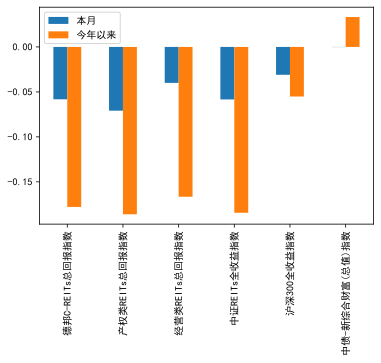

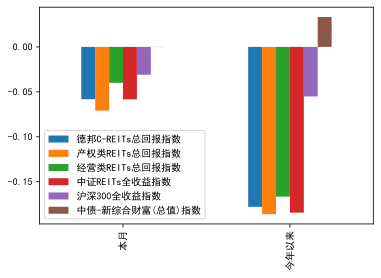

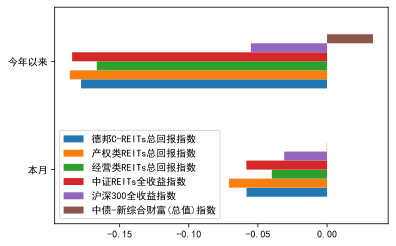

In [39]:
# 速画图像
df_chart.plot(kind='bar')
df_chart.T.plot(kind='bar')
df_chart.T.plot.barh()  # 转置后，使用barh貌似会是标签的显示顺序反过来，故暂时不采用！参考链接： https://www.cnpython.com/qa/43752

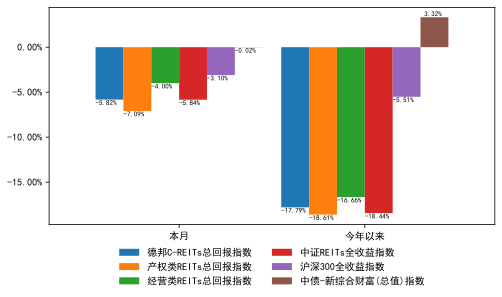

In [40]:

# 画图：月度及年度回报对比：大类指数

bar_chart = df_chart.T.plot.bar(figsize=(8,4),width=0.9)  # 这里df_chart.T转置了,index变成“今年以来”和“本月”
# 使用barh貌似会是标签的显示顺序反过来，故暂时不采用！参考链接： https://www.cnpython.com/qa/43752
# width决定了柱子的宽度，仅代表形状宽度而已，默认似乎为0.5
# 这里取bar_chart是为了后续调用bar_chart.patches，设置图像数据的标签

# 格式美化
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))  # y轴百分位格式
plt.xticks(rotation=0) # X轴水平，默认是90度垂直的
plt.legend(bbox_to_anchor=(0.5, -0.3), loc=8, borderaxespad=0,fontsize=10, ncol=2, frameon=False) # legend在图外正下方
# 添加数字标签
yRange= plt.ylim()[1]-plt.ylim()[0] # plt.ylim()返回图像y轴的上下界，结果是tuple；等价于plt.gca().get_ylim()
for rect in bar_chart.patches:
    if rect.get_height() > 0: # 柱状图的高度即为值，如果为正，当柱子很少(这里大概是6个)，柱子比较宽，适当调整了x位置让其居中
        plt.annotate(f"{rect.get_height():.2%}",(rect.get_x() + (0.02 if rect.get_width()>0.12 else 0),
                                                 rect.get_y()+rect.get_height()+yRange/200),fontsize=7) # yRange/200大概是0.001
    else: # 负的柱子，调整y位置，下面的值：-yRange/40是试出来的，先找了个合适的绝对值出来，然后观察与y轴范围的关系。
        plt.annotate(f"{rect.get_height():.2%}",(rect.get_x(),rect.get_y()+rect.get_height()-yRange/40),fontsize=7) # yRange/40

        
# 保存成png的格式，dpi取500，300貌似都行，越高的分辨率越高，对应的文件大小越大
plt.savefig("C-REITs月度及年度回报对比.png", dpi=1000, bbox_inches='tight')  

plt.show()

In [41]:

# REITs细分板块(项目类型)：FUND__REITSTYPE
# 基金简称：fund_info_name 基金场内简称：fund_exchangeshortname
df = w.wss(reits_list, "fund_info_name, fund_exchangeshortname, fund_reitsrproperty, fund__reitstype", usedf=True)[1]

df

,FUND_INFO_NAME,FUND_EXCHANGESHORTNAME,FUND_REITSRPROPERTY,FUND__REITSTYPE
180101.SZ,博时招商蛇口产业园REIT,博时蛇口产园REIT,产权类,园区基础设施
180102.SZ,华夏合肥高新产园REIT,华夏合肥高新REIT,产权类,园区基础设施
180103.SZ,华夏杭州和达高科产园REIT,华夏和达高科REIT,产权类,园区基础设施
180201.SZ,平安广州交投广河高速公路REIT,平安广州广河REIT,特许经营类,交通基础设施
180202.SZ,华夏越秀高速公路封闭式基础设施REIT,华夏越秀高速REIT,特许经营类,交通基础设施
180301.SZ,红土创新盐田港仓储物流REIT,红土创新盐田港REIT,产权类,仓储物流
180401.SZ,鹏华深圳能源REIT,鹏华深圳能源REIT,产权类,能源基础设施
180501.SZ,红土创新深圳人才安居REIT,红土创新深圳安居REIT,产权类,保障性租赁住房
180801.SZ,中航首钢生物质REIT,中航首钢绿能REIT,特许经营类,生态环保
508000.SH,华安张江产业园REIT,张江REIT,产权类,园区基础设施


In [42]:

# 绘制各REITs细分板块的月度/年度的涨跌幅

# reitsType：细分板块名称
# 对比的指数包含沪深300全收益指数，以及一个可选的股票板块指数(如有)：代码及图中显示的名称
# 可变参数index2Compare: 长度可变，每个元素均为tuple，即(代码, 自定义名称)
# 案例：(Python中函数的各种类型参数详解)  https://blog.csdn.net/oJinGangZuan/article/details/127204208

def plot_return_comparision_per_reits_type(reitsType, *index2Compare):

    # 获取对应REITs细分版块的全部代码
    df = w.wss(reits_list, "fund_reitsrproperty, fund__reitstype", usedf=True)[1]
    codes_list = df[df["fund__reitstype".upper()]==reitsType].index.to_list()
    
    # 获取细分板块对应的流通市值(取当月月末值)，计算权重。
    # 获取日截面数据函数WSS。WSS支持取多品种多指标某个时间点的截面数据。可以指定日期(可选，不填则默认最新数据)，参数tradeDate
    df = w.wss(codes_list, "val_mvc", f"tradeDate={end_date}", usedf=True)[1] # REITs流通市值(val_mvc)
    weights = df/df.sum()
    
#     print(weights)
#     print(len(weights))
    
    # 添加要对比的指数，N个可选指数(可变参数)，长度可变，每个元素均为tuple，格式为(代码, 自定义名称)
    for indexCode, indexName in index2Compare:
        codes_list = codes_list + [indexCode] # 列表合并操作
    # 添加沪深300全收益指数：H00300.CSI
    codes_list = codes_list + ["H00300.CSI"] # 沪深300放在最后面
                               
    # 获取每日涨跌幅
    df=w.wsd(codes_list, 
          "pct_chg", 
          start_date, end_date, "priceAdj=U", usedf=True)[1]  # "priceAdj=U"不起作用，实际用的复权

    # 重命名REITs列：代码=》简称。# 基金简称：fund_info_name 基金场内简称：fund_exchangeshortname
    df = df.rename(columns=w.wss(reits_list, "fund_exchangeshortname", # 基金场内简称：fund_exchangeshortname
                                 usedf=True)[1].to_dict()["fund_exchangeshortname".upper()])
    # 重命名可选的指数列
    for indexCode, indexName in index2Compare:
        df = df.rename(columns={indexCode: indexName})                      
    # 重命名沪深300
    df = df.rename(columns={"H00300.CSI": "沪深300"})

    # WIND涨跌幅(pct_chg)简单收益率转换成对数收益率，因为对数收益率方便直接相加！
    # 1+简单收益率=收盘价/前个收盘价=exp(对数收益率)
    # 对数收益率=Ln(1+简单收益率)
    df=df.apply( lambda x: np.log(1+x/100)) # WIND涨跌幅返回值需要除100

    # 将日期index转换object为日期类型，方便后续使用日期函数相关的操作
    df.index=pd.to_datetime(df.index,format='%Y-%m-%d') 

    
    # 计算月度和年度收益率
    
    # 方法一(有BUG)，直接使用WIND函数，月度涨跌幅pct_chg：传入参数Period=M，默认是D
    #*************************************************************************************
    # 注意：这里WIND计算首月涨跌幅时有BUG！！！非上市首月的涨跌幅则没问题。
    # pct_chg计算首月涨跌幅的分母似乎是上市首日的收盘价，而不是发行价格；而pct_chg默认的日涨跌幅序列，首日的涨跌幅分母是发行价，没问题。
    #*************************************************************************************
    # 方法二(推荐！)，基于日涨跌幅，手动分组，计算月涨跌幅！
    # Pandas按月份和年份分组（日期为datetime64[ns]），并汇总
    # https://www.cnpython.com/qa/1311357
    
    # 按月分组并求和(按月M；按季度是q；按年是a)
    # datetime支持to_period转换，因此我们可以按月对所有内容进行分组
    # 注意这里的日期刚好在index中，可以直接df.index.to_period('M')。否则如果日期是某一列中，则应该接一个dt比如df['date'].dt.to_period('M')
    df_month = df.groupby(df.index.to_period('M')).sum()  # 这里sum()会将NA当成0处理
    # 对数收益率转简单收益率，即月涨跌幅
    df_month = df_month.apply(lambda x: np.exp(x)-1)

    # 按年分组并求和(按月M；按季度是q；按年是a)
    df_year = df.groupby(df.index.to_period('a')).sum()  # 这里sum()会将NA当成0处理
    # 对数收益率转简单收益率，即月涨跌幅
    df_year = df_year.apply(lambda x: np.exp(x)-1)
    
     
    # 取当月和当月数据，并合并
    df_chart = pd.merge(

                    # 取当月的收益率
                    df_month.loc[date_object.strftime("%Y-%m")].to_frame("本月"),
                    # 取当年的收益率
                    df_year.loc[date_object.strftime("%Y")].to_frame("今年以来"),
        
                    left_index=True,right_index=True
    
    )

#     print(df_chart)
    
    
    # 根据之前计算的权重数据，计算细分板块REITs的本月和今年以来的整体表现。
    weight_sums = ((df_chart.iloc[:len(weights)].values) * (weights.values)).sum(axis=0)
    # len(weights)：只取前N行的REITs数据，.values转化为numpy方便运用广播机制，pandas的广播机制貌似不太好用
    # weights.values是一个1 x len(weights)的矩阵，列向量，会广播成2列，分别与“本月”列和“今年以来”列相除。

    # 方法一：直接插入一行。但是位置是在dataframe的最后一行。
    # new_row = {'本月': weight_sums[0], '今年以来': weight_sums[1]}
    # df_chart.loc["整体REITs表现", :] = new_row  # 新增一行
    
    # 方法二：concat插入新行，这样可以调整到首行
    df_chart = pd.concat([pd.DataFrame({'本月': weight_sums[0], '今年以来': weight_sums[1]},index=[reitsType + "类REITs整体"]),
                          df_chart])
    # concat(): 将多个Series或DataFrame连接到一起，默认为按行连接(axis参数默认为0)，结果的行数为被连接数据的行数之和。
    
    
    # 画图
    bar_chart = df_chart.T.plot.bar(figsize=(8,4),width=0.9)  # 这里df_chart.T转置了,index变成“今年以来”和“本月”
    # width决定了柱子的宽度，仅代表形状宽度而已，默认似乎为0.5
    # 格式美化
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))  # y轴百分位格式
    plt.xticks(rotation=0) # X轴水平，默认是90度垂直的
    plt.legend(bbox_to_anchor=(0.5, -0.35), loc=8, borderaxespad=0,fontsize=10, ncol=4, frameon=False) # legend在图外正下方
    # 添加数字标签：plt.annotate('text',(x,y))
    yRange= plt.ylim()[1]-plt.ylim()[0] # plt.ylim()返回图像y轴的上下界，结果是tuple；等价于plt.gca().get_ylim()
    for rect in bar_chart.patches:
        if rect.get_height() > 0: # 柱状图的高度即为值，如果为正，当柱子很少(这里大概是6个)，柱子比较宽，适当调整了x位置让其居中
            plt.annotate(f"{rect.get_height():.2%}",(rect.get_x() + (0.02 if rect.get_width()>0.12 else 0),
                                                     rect.get_y()+rect.get_height()+yRange/200),fontsize=6) # yRange/200大概是0.001
        else: # 负的柱子，调整y位置，下面的值：-yRange/40是试出来的，先找了个合适的绝对值出来，然后观察与y轴范围的关系。
            plt.annotate(f"{rect.get_height():.2%}",(rect.get_x(),rect.get_y()+rect.get_height()-yRange/40),fontsize=6) # yRange/40
    
    # 保存成png的格式，dpi取500，300貌似都行，越高的分辨率越高，对应的文件大小越大
    plt.savefig(f"{reitsType}月度及年度回报对比.png", dpi=1000, bbox_inches='tight')  
    plt.show()


    return df_chart

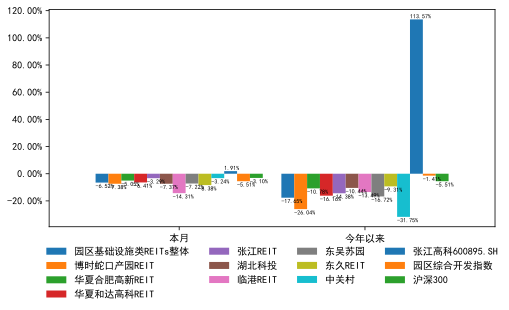

,本月,今年以来
园区基础设施类REITs整体,-0.065231,-0.176452
博时蛇口产园REIT,-0.073837,-0.260412
华夏合肥高新REIT,-0.050519,-0.107846
华夏和达高科REIT,-0.064131,-0.161579
张江REIT,-0.032928,-0.143785
湖北科投,-0.073680,-0.104381
临港REIT,-0.143050,-0.134917
东吴苏园,-0.072170,-0.167216
东久REIT,-0.083777,-0.093084
中关村,-0.032423,-0.317484


In [43]:
# 添加要对比的指数，N个可选指数(可变参数)，长度可变，每个元素均为tuple，格式为(代码, 自定义名称)
plot_return_comparision_per_reits_type("园区基础设施", ("600895.SH","张江高科600895.SH"),("CI005351.WI","园区综合开发指数"))

# 下面这种方法也可以，就是可变参数打包成一个list或tuple，但是最终传入的时候，必须也加个*，表示解包成元素，作为可变参数传入函数中！
# index_list = [("600895.SH","张江高科600895.SH"),("CI005351.WI","园区综合开发指数")]
# plot_return_comparision_per_reits_type("园区基础设施", *index_list)


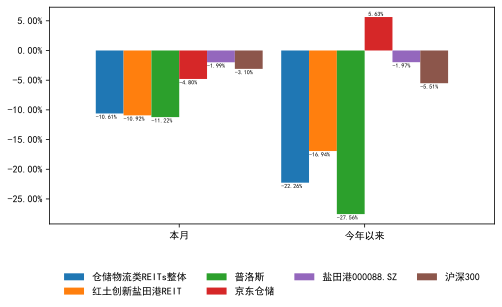

,本月,今年以来
仓储物流类REITs整体,-0.106104,-0.222645
红土创新盐田港REIT,-0.109238,-0.169360
普洛斯,-0.112211,-0.275556
京东仓储,-0.047961,0.056346
盐田港000088.SZ,-0.019881,-0.019708
沪深300,-0.030971,-0.055119


In [44]:
plot_return_comparision_per_reits_type("仓储物流",("000088.SZ","盐田港000088.SZ"))

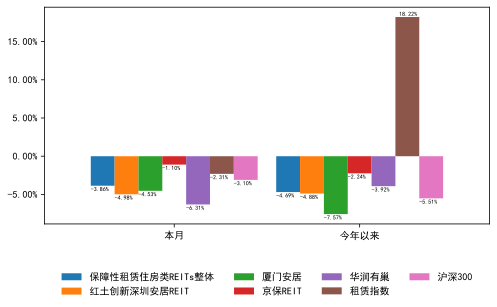

,本月,今年以来
保障性租赁住房类REITs整体,-0.038588,-0.046896
红土创新深圳安居REIT,-0.049791,-0.048843
厦门安居,-0.045287,-0.075740
京保REIT,-0.010957,-0.022398
华润有巢,-0.063109,-0.039184
租赁指数,-0.023087,0.182177
沪深300,-0.030971,-0.055119


In [45]:
plot_return_comparision_per_reits_type("保障性租赁住房",("CI005526.WI","租赁指数"))

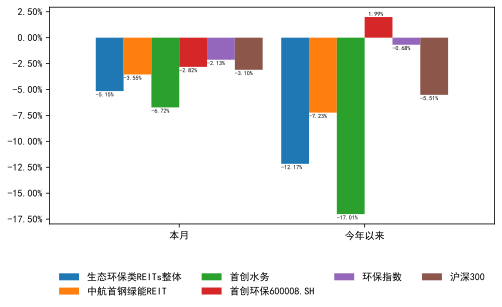

,本月,今年以来
生态环保类REITs整体,-0.051497,-0.121658
中航首钢绿能REIT,-0.035473,-0.072291
首创水务,-0.067234,-0.170144
首创环保600008.SH,-0.028169,0.019907
环保指数,-0.021274,-0.006826
沪深300,-0.030971,-0.055119


In [46]:
plot_return_comparision_per_reits_type("生态环保",("600008.SH","首创环保600008.SH"),("886024.WI","环保指数"))

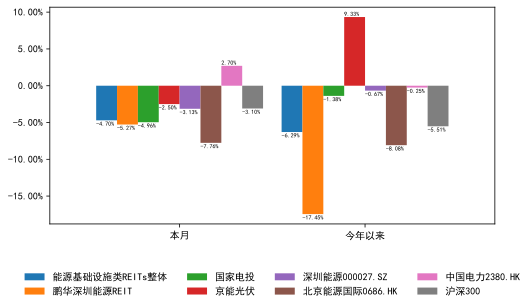

,本月,今年以来
能源基础设施类REITs整体,-0.047041,-0.062925
鹏华深圳能源REIT,-0.052722,-0.174462
国家电投,-0.049605,-0.013813
京能光伏,-0.024979,0.093335
深圳能源000027.SZ,-0.031348,-0.006674
北京能源国际0686.HK,-0.077626,-0.080792
中国电力2380.HK,0.027027,-0.002533
沪深300,-0.030971,-0.055119


In [47]:
plot_return_comparision_per_reits_type("能源基础设施",("000027.SZ","深圳能源000027.SZ"),("0686.HK","北京能源国际0686.HK"),
                                      ("2380.HK","中国电力2380.HK"))

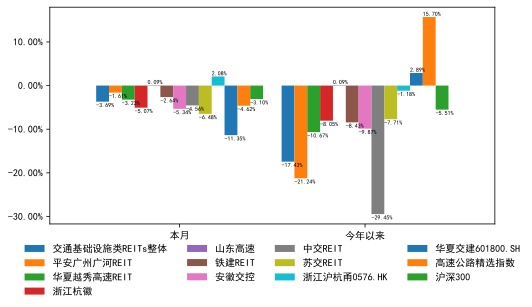

,本月,今年以来
交通基础设施类REITs整体,-0.036854,-0.174301
平安广州广河REIT,-0.016136,-0.212370
华夏越秀高速REIT,-0.032258,-0.106655
浙江杭徽,-0.050692,-0.080471
山东高速,0.000938,0.000938
铁建REIT,-0.026406,-0.084339
安徽交控,-0.053355,-0.098682
中交REIT,-0.045554,-0.294481
苏交REIT,-0.064830,-0.077077
浙江沪杭甬0576.HK,0.020797,-0.011771


In [48]:
plot_return_comparision_per_reits_type("交通基础设施",("0576.HK","浙江沪杭甬0576.HK"),("601800.SH","华夏交建601800.SH"),
                                      ("8841399.WI","高速公路精选指数"))

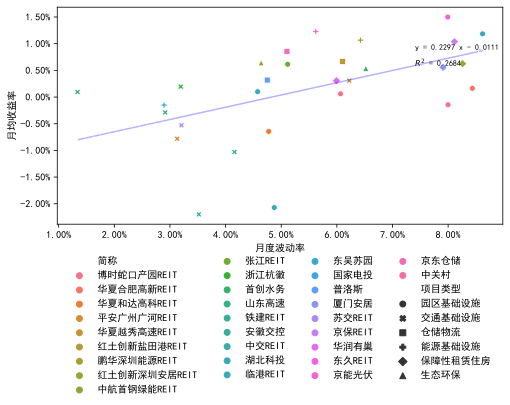

In [49]:
# REITs风险收益图

# 读取生成的数据
df = pd.read_excel(path + '\\' + file,sheet_name="REITs风险收益")

# 将读取的第1列设置为索引，空白列名，默认值是'Unnamed: 0'
df.set_index('Unnamed: 0', inplace=True)
df.index.name=""  # 去掉'Unnamed: 0'

# 获取细分类别字段，并合并
df = pd.merge(
                        df,
                        # REITs属性(产权/经营权): fund_reitsrproperty；REITs细分板块(项目类型)：FUND__REITSTYPE
                        w.wss(df.index.to_list(), "fund_reitsrproperty, fund__reitstype", 
                              usedf=True)[1].rename(columns={"fund__reitstype".upper(): "项目类型"}), # 顺便重名列名，方便后面
                        left_index=True,right_index=True

                    )

df

# 2023-10-09 by Bo: 有时候有新上市的REIT(山东高速)，尚未有表现期，波动率和收益率字段是NA值，拟合数据值会报错，这里将其剔除掉
df.dropna(inplace=True)

# 画图
plt.figure(figsize=(8, 4))

# 这里画图的代码可以进一步参考：REITs_chart_v20230204.ipynb
# 案例一：sns画类别散点气泡图：
# http://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://blog.csdn.net/qq_45913057/article/details/123366205
# 优点：方便简洁：legend清晰
sns.scatterplot(data=df, x='月度波动率',y='月均收益率', hue="简称", style="项目类型")

# 百分比格式
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
# the trendline    

# 添加趋势线并标注
x=df['月度波动率'] 
y=df['月均收益率']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--", alpha=0.3)

# R方
correlation = np.corrcoef(y, p(x))[0,1]  # 相关系数, np.corrcoef返回的是相关系数2维矩阵，取0,1对应的值
r2 = correlation**2   #R方  # https://blog.csdn.net/yoggieCDA/article/details/106543375


# # 文本
# plt.gca().annotate(f'y = {str(p).strip()}', xy=(0.075,0.02), fontsize=8)  # 注意根据数据，调整x,y的显示坐标！超出坐标轴范围就不显示了！！
# plt.gca().annotate(f'$R^2$ = {r2:.4f}', xy=(0.075,0.017),fontsize=8)
plt.gca().annotate(f'y = {str(p).strip()}', xy=( x.max()-(x.max()-x.min())/6,
                                               y.max()-(y.max()-y.min())/6 ), 
                                                fontsize=8)  # Bo:2023-11-02,修改坐标位置为相对位置，避免超过图像边界无法显示的问题。
plt.gca().annotate(f'$R^2$ = {r2:.4f}', xy=( x.max()-(x.max()-x.min())/6,
                                               y.max()-(y.max()-y.min())/6-0.003 ),
                                                fontsize=8)

# 设置legend在图像外：http://www.kaotop.com/it/19432.html
# plt.legend(loc='upper left',fontsize=11)
# plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0,fontsize=10) # legend在图外右下
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,fontsize=11) # legend在图外右上
plt.legend(bbox_to_anchor=(0.5, -0.80), loc=8, borderaxespad=0,fontsize=10, ncol=4, frameon=False) # legend在图外正下方


# 保存成png的格式，dpi取500，300貌似都行，越高的分辨率越高，对应的文件大小越大
plt.savefig(f"不同REITs产品风险回报对比.png", dpi=1000, bbox_inches='tight')  
plt.show()


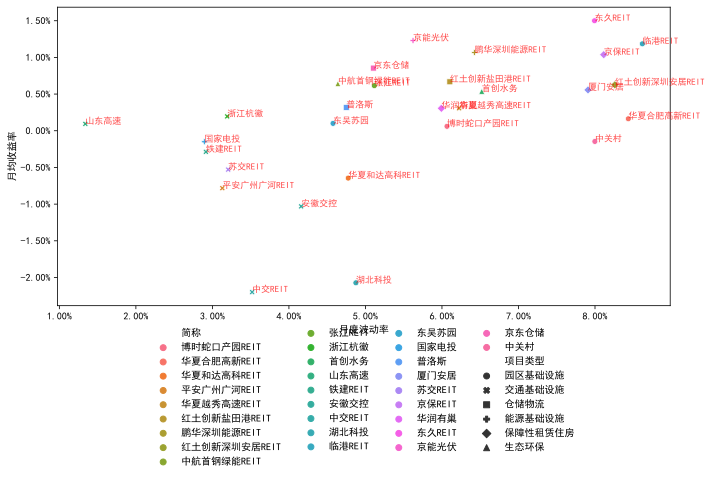

In [50]:
# REITs风险收益图(自己看的，标注版本)

# 读取生成的数据
df = pd.read_excel(path + '\\' + file,sheet_name="REITs风险收益")

# 将读取的第1列设置为索引，空白列名，默认值是'Unnamed: 0'
df.set_index('Unnamed: 0', inplace=True)
df.index.name=""  # 去掉'Unnamed: 0'

# 获取细分类别字段，并合并
df = pd.merge(
                        df,
                        # REITs属性(产权/经营权): fund_reitsrproperty；REITs细分板块(项目类型)：FUND__REITSTYPE
                        w.wss(df.index.to_list(), "fund_reitsrproperty, fund__reitstype", 
                              usedf=True)[1].rename(columns={"fund__reitstype".upper(): "项目类型"}), # 顺便重名列名，方便后面
                        left_index=True,right_index=True

                    )

df

# 2023-10-09 by Bo: 有时候有新上市的REIT(山东高速)，尚未有表现期，波动率和收益率字段是NA值，拟合数据值会报错，这里将其剔除掉
df.dropna(inplace=True)

# 画图
plt.figure(figsize=(11, 5.5))

# 这里画图的代码可以进一步参考：REITs_chart_v20230204.ipynb
# 案例一：sns画类别散点气泡图：
# http://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://blog.csdn.net/qq_45913057/article/details/123366205
# 优点：方便简洁：legend清晰
# sns.scatterplot(data=df, x='月度波动率',y='月均收益率', style="项目类型")
sns.scatterplot(data=df, x='月度波动率',y='月均收益率', hue="简称", style="项目类型")

# 百分比格式
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 


# 文本
# 给散点加标签
# texts = [plt.gca().text(df['月度波动率'].iloc[i], df['月均收益率'].iloc[i], df['简称'].iloc[i]) for i in range(len(df))]
texts = [plt.gca().text(df['月度波动率'].iloc[i], df['月均收益率'].iloc[i], df['简称'].iloc[i],
                        fontsize=9, color='red', alpha=0.7) for i in range(len(df))]


# 设置legend在图像外：http://www.kaotop.com/it/19432.html
plt.legend(bbox_to_anchor=(0.5, -0.55), loc=8, borderaxespad=0,fontsize=10, ncol=4, frameon=False) # legend在图外正下方
# 隐藏图例
# plt.gca().get_legend().remove()


plt.show()
